### Actividad relacionada con la lección 2:

In [1]:
import numpy as np
import matplotlib
import pandas as pd


    
#### 1. Carga el dataset Indian-Liver-Patient.


In [2]:
df = pd.read_csv("indian_liver_patient.csv")
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


#### 2. Identifica numérica o gráficamente aquellas variables que son susceptibles de aplicar una transformación.


In [3]:
df.corr()

C:\Users\Mauro.CespedesAraya\AppData\Local\Temp\ipykernel_45124\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
Age,1.000000,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216408,-0.137351
Total_Bilirubin,0.011763,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206267,-0.220208
Direct_Bilirubin,0.007529,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200125,-0.246046
Alkaline_Phosphotase,0.080425,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.234166,-0.184866
Alamine_Aminotransferase,-0.086883,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002375,-0.163416
Aspartate_Aminotransferase,-0.019910,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070040,-0.151934
Total_Protiens,-0.187461,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.234887,0.035008
Albumin,-0.265924,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.689632,0.161388
Albumin_and_Globulin_Ratio,-0.216408,-0.206267,-0.200125,-0.234166,-0.002375,-0.070040,0.234887,0.689632,1.000000,0.163131
Dataset,-0.137351,-0.220208,-0.246046,-0.184866,-0.163416,-0.151934,0.035008,0.161388,0.163131,1.000000


Utilizamos la funcion de pandas **.skew**

Este metodo nos presenta el sesgo de cada una de las variables

In [4]:
df.skew()

C:\Users\Mauro.CespedesAraya\AppData\Local\Temp\ipykernel_45124\1665899112.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


Age                           -0.029385
Total_Bilirubin                4.907474
Direct_Bilirubin               3.212403
Alkaline_Phosphotase           3.765106
Alamine_Aminotransferase       6.549192
Aspartate_Aminotransferase    10.546177
Total_Protiens                -0.285672
Albumin                       -0.043685
Albumin_and_Globulin_Ratio     0.992299
Dataset                        0.947140
dtype: float64

Podemos observar que **Aspartate_Aminotransferase** presenta valores muy por encima de 0

Esto significa que dentro de la variable existe un valor o varios que estan muy a la derecha de los datos

#### Veamos estos datos de manera gráfica a traves de un Histograma

Ésta es la forma como confirmamos el **Sesgo** de cada variable en forma grafica

**AGE** tienen la mayoría de los valores en el centro de la grafica

Mientras que **Total_Bilirubin** vemos que la mayoria de valores se concentran en la parte izquierda

Así vamos  confirmando los valores numéricos que teníamos

array([[<AxesSubplot: title={'center': 'Age'}>,
        <AxesSubplot: title={'center': 'Total_Bilirubin'}>,
        <AxesSubplot: title={'center': 'Direct_Bilirubin'}>],
       [<AxesSubplot: title={'center': 'Alkaline_Phosphotase'}>,
        <AxesSubplot: title={'center': 'Alamine_Aminotransferase'}>,
        <AxesSubplot: title={'center': 'Aspartate_Aminotransferase'}>],
       [<AxesSubplot: title={'center': 'Total_Protiens'}>,
        <AxesSubplot: title={'center': 'Albumin'}>,
        <AxesSubplot: title={'center': 'Albumin_and_Globulin_Ratio'}>]],
      dtype=object)

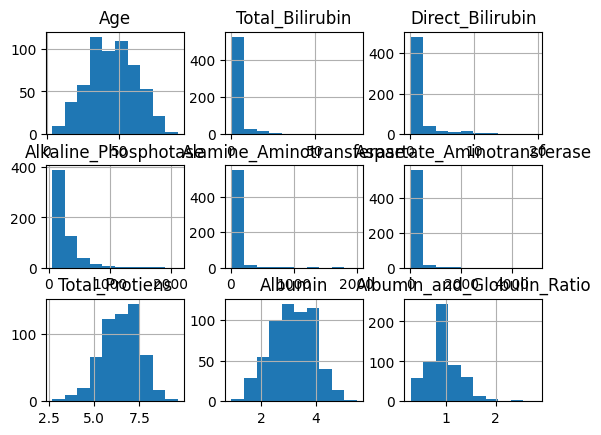

In [5]:

# Cada una de las varaiables que conforman el DATA SET
input_data = df[df.columns[:-1]]
input_data.hist()

#### Densidad

Podemos conseguri la misma grafica con los metodos de densidad

array([[<AxesSubplot: ylabel='Density'>, <AxesSubplot: ylabel='Density'>,
        <AxesSubplot: ylabel='Density'>],
       [<AxesSubplot: ylabel='Density'>, <AxesSubplot: ylabel='Density'>,
        <AxesSubplot: ylabel='Density'>],
       [<AxesSubplot: ylabel='Density'>, <AxesSubplot: ylabel='Density'>,
        <AxesSubplot: ylabel='Density'>]], dtype=object)

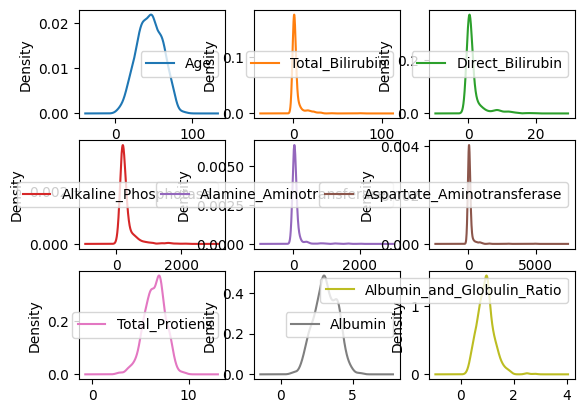

In [6]:
input_data.plot(kind='density', subplots=True, layout=(3,3), sharex=False)

#### Boxplot

Muestra lo mismo solo que la caja es igual que la gráfica y los  puntos negros son **OULIERS** que se salen complemtamente d ela media.

Age                              AxesSubplot(0.125,0.653529;0.227941x0.226471)
Total_Bilirubin               AxesSubplot(0.398529,0.653529;0.227941x0.226471)
Direct_Bilirubin              AxesSubplot(0.672059,0.653529;0.227941x0.226471)
Alkaline_Phosphotase             AxesSubplot(0.125,0.381765;0.227941x0.226471)
Alamine_Aminotransferase      AxesSubplot(0.398529,0.381765;0.227941x0.226471)
Aspartate_Aminotransferase    AxesSubplot(0.672059,0.381765;0.227941x0.226471)
Total_Protiens                       AxesSubplot(0.125,0.11;0.227941x0.226471)
Albumin                           AxesSubplot(0.398529,0.11;0.227941x0.226471)
Albumin_and_Globulin_Ratio        AxesSubplot(0.672059,0.11;0.227941x0.226471)
dtype: object

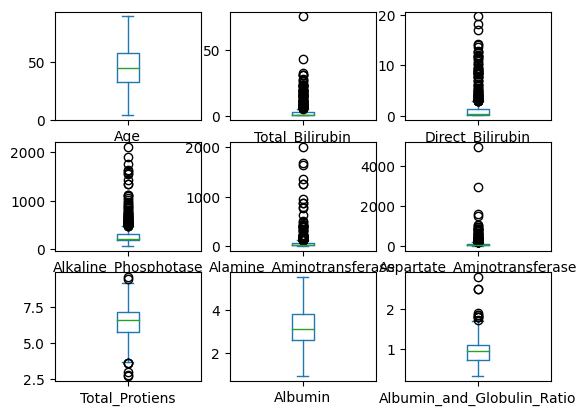

In [7]:
input_data.plot(kind='box', subplots=True, layout=(3,3), sharex=False)

#### 3. Elige una variable numérica y aplica uno a uno todos los métodos de escalado de datos que se han visto en la lección.


 Entonces voy a escojer la variable **Aspartate_Aminotransferase**


#### MinMaxScaler

Esto es para que los datos se mantengan entre 0, 1, pero permite que con **feature_range()** utilizar otros datos

In [8]:
from pandas import read_csv
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [9]:
# Definimos un objeto de la clase mimaxscaler
minmaxSc = MinMaxScaler(feature_range=(0,1))

# Y alimentamos con los t¡datos de entrenamiento para genenrar la transformacion lieneal
# Scaling the Price column of the created dataFrame and storing
# the result in ScaledPrice Column
df[['MinMax']] = minmaxSc.fit_transform(df[['Aspartate_Aminotransferase']])

# Utilizamo el metodo TRAMNSFORM sobre los datos de entrada
# Se genera un nuevo dataframe que contienen las variables reescaladas
#rescX = minmaxSc.transform(X)

In [10]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,MinMax
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1,0.001626
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1,0.018296
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1,0.011791
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1,0.002033
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1,0.009961


#### StandardScaler

Esto nos garantiza que todas las variables tienene la misma **media** y la misam **desviacion tipica**

Pero esto no funciona tan bien con muchos **Outliers** , porque la media no es representativa

En ese cada se utiliza en reescalado Robusto que toma la **Mediana (q2)**

El quartil 2 es menos sensible a los **ouliers** y tambien consigue el **Rango intercuartilico (Q3-Q1)**

In [11]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

# Definimos un objeto de la clase Standard Scaler
# Trata de normalizar los datos.
StandardSc = StandardScaler()

In [12]:
# Y alimentamos con los t¡datos de entrenamiento para genenrar la transformacion lieneal
# Scaling the Price column of the created dataFrame and storing
# the result in ScaledPrice Column
df[['Std']] = StandardSc.fit_transform(df[['Aspartate_Aminotransferase']])

In [13]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,MinMax,Std
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1,0.001626,-0.318393
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1,0.018296,-0.034333
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1,0.011791,-0.145186
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1,0.002033,-0.311465
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1,0.009961,-0.176363


#### Robust Scaler

In [14]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler

# Definimos un objeto de la clase Standard Scaler
# Trata de normalizar los datos.
RobustSc = RobustScaler()

In [15]:
# Y alimentamos con los t¡datos de entrenamiento para genenrar la transformacion lieneal
# Scaling the Price column of the created dataFrame and storing
# the result in ScaledPrice Column
df[['Robust']] = RobustSc.fit_transform(df[['Aspartate_Aminotransferase']])

In [16]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,MinMax,Std,Robust
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1,0.001626,-0.318393,-0.387097
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1,0.018296,-0.034333,0.935484
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1,0.011791,-0.145186,0.419355
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1,0.002033,-0.311465,-0.354839
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1,0.009961,-0.176363,0.274194


#### 4. Compara gráficamente mediante un gráfico de densidad los efectos producidos en la variable.

In [17]:
# Creo un su dataset con las variables que deseo mostrar

data = df[['Aspartate_Aminotransferase','MinMax','Std','Robust']]



array([[<AxesSubplot: ylabel='Density'>, <AxesSubplot: ylabel='Density'>],
       [<AxesSubplot: ylabel='Density'>, <AxesSubplot: ylabel='Density'>]],
      dtype=object)

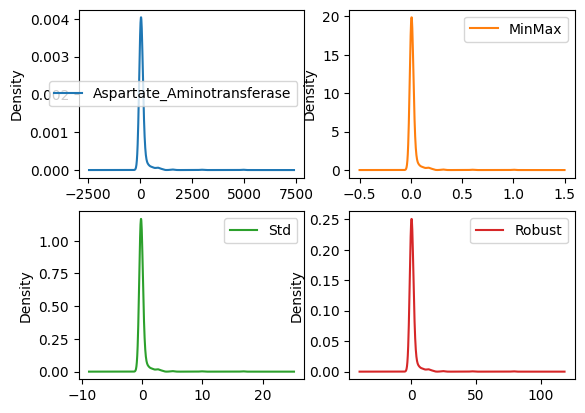

In [18]:
data.plot(kind='density', subplots=True, layout=(2,2), sharex=False)

La forma de la gráfica se mantiene casi que igual para esta variable. Cambia el escalado sobre el eje X